In [1]:
import requests
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
import geopandas as gpd
import numpy as np


In [3]:
path_vec_tibet = 'data/tibet/tibet-boundary/TPBoundary_HF/TPBoundary_HF_wgs84.shp'
geodf_vec_tibet = gpd.read_file(path_vec_tibet)


In [4]:
### transform utm projection to wgs84 projection
# tibet_mpolygon = geodf_vec_tibet['geometry']
# tibet_mpolygon_wgs84 = tibet_mpolygon.to_crs({'init': 'epsg:4326'})
# # print(tibet_mpolygon.bounds)
# bounds = tibet_mpolygon_wgs84.bounds
# bounds


## **Download SRTM DEM**

In [6]:
# tibet_bounds = ([70, 23, 108, 42])    # west, south, east, north
# ## !!!! unable to download so big data by using requests api.
# # !!!! so download by spliting the region or from the web manualy: 
# #       https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1
# demtype = "SRTMGL3"

# ## tile 1
# url = "https://portal.opentopography.org/API/globaldem?demtype={}&west={}&south={}&east={}&north={}&outputFormat=GTiff".format(demtype, *tibet_bounds)
# path_dem = config.root_proj + '/data/tibet/dem/' + 'tibet_{}.tif'.format(demtype)
# #  ----- download -----  ##
# response = requests.get(url)
# if not os.path.exists(path_dem):
#     open(path_dem, 'wb').write(response.content)


### Check the downloaded data

In [4]:
path_dem = 'data/tibet/dem/tibet_SRTMGL3.tif'
dem_img, _ = readTiff(path_dem)


### Mosaic

In [8]:
# os.chdir(config.root_proj + '/data/tibet/dem')

# file_1 = 'output_SRTMGL3_1.tif'
# file_2 = 'output_SRTMGL3_2.tif'
# out_file = 'tibet_SRTMGL3.tif'
# !gdal_merge.py -init 0 -o $out_file $file_1 $file_2


### Downsampling

In [5]:
# ## downsampling
path_srtm_down = 'data/tibet/dem/tibet_SRTMGL3_down.tif' 
!gdal_translate -outsize 20% 20% -r average $path_dem $path_srtm_down


Input file size is 45600, 22800
Warning 1: PROJ: proj_create_from_database: Open of /home/xin/miniconda3/envs/venv-tibetwater/share/proj failed
ERROR 1: PROJ: proj_create_from_name: Open of /home/xin/miniconda3/envs/venv-tibetwater/share/proj failed
0...10...20...30...40...50...60...70...80...90...100 - done.


### Check downsampling

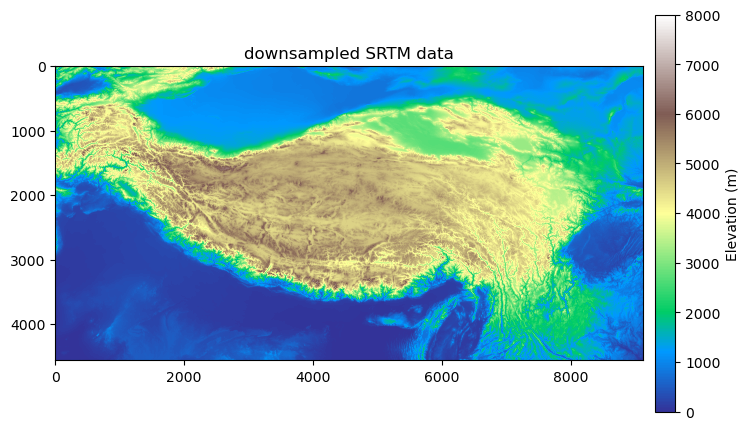

In [6]:
## check
srtm_down, srtm_down_info = readTiff(path_srtm_down)
cmap = plt.cm.terrain
plt.figure(figsize=(8, 7))
plt.subplot(1,1,1)
plt.title('downsampled SRTM data') 
plt.imshow(srtm_down, cmap=cmap, clim=[0, 8000], alpha=1)
plt.colorbar(fraction=0.0320, pad=0.02, label='Elevation (m)')
